# param estim 4lump

 $k_12$, $k_13$, $k_14$, $k_23$ and $k_24$ are estimated by the function param_estim_4lump for the set
 of equations given below.

 $ \frac{dy_1}{dt} = -(k_12+k_13+k_14)*y_1^2 $
 
 $ \frac{dy_2}{dt} = k_12*y_1^2-k_23*y_2-k_24*y_2 $
 
 $ \frac{dy_3}{dt} = k_13*y_1^2+k_23*y_2 $
 
 $ \frac{dy_4}{dt} = k_14*y_1^2+k_24*y_2 $

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Data for three-lump model
xaxisData = np.array( [1/60, 1/30, 1/20, 1/10] ) # time(h) 
yaxisData = np.array( [ [0.5074, 0.3796, 0.2882, 0.1762], [0.3767, 0.4385, 0.4865, 0.5416],[0.0885, 0.136, 0.1681, 0.2108],[0.0274, 0.0459, 0.0572, 0.0714] ] ) # % VGO, Gasoline, Gas, Coke 
conversion = np.array([0.4926, 0.6204, 0.7118, 0.8238])
# Initial guesses for parameters k12 & k13 & k14 & k23 & k24  
k12guess=2;
k13guess=1;
k14guess=5;
k23guess=1;
k24guess=1; 
parameterGuesses = np.array([k12guess,k13guess,k14guess,k23guess,k24guess])

Define ODEs for three-lump model
 Uses params = [k_12, k_13, k_14, k_23, k_24]

In [2]:
def ODE_definition(x,t,args): #deriv (yvar, xvar,arguments)
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    k12 = args[0]
    k13 = args[1]
    k14 = args[2]
    k23 = args[3]
    k24 = args[4]
    dx1dt=-(k12+k13+k14)*x1**2;
    dx2dt=k12*x1**2-k23*x2-k24*x2;
    dx3dt=k13*x1**2+k23*x2;
    dx4dt=k14*x1**2+k24*x2;
    
    return dx1dt, dx2dt, dx3dt, dx4dt

 Define the model for three-lump model, which requires solution to a system of differential equations
 Uses current params values and xaxisData as the final point in the tspan for the ODE solver


In [3]:
def ODEmodel(xaxisData,*params):
    #Initial condition for ODE in three-lump model
    yaxis0 = np.array([1,0,0,0])
    numYaxisVariables = 4 
    yaxisOutput = np.zeros((xaxisData.size,numYaxisVariables)) 
    for i in np.arange(0,len(xaxisData)):
        xaxisIncrement = 0.001 # adjust as needed for your problem
        xaxisSpan = np.arange(0,xaxisData[i]+xaxisIncrement,xaxisIncrement)
        y_calc = odeint(ODE_definition,yaxis0,xaxisSpan,args=(params,)) 
        yaxisOutput[i,:]=y_calc[-1,:] 
    yaxisOutput = np.transpose(yaxisOutput)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

Estimate parameters for three-lump model

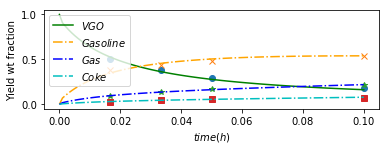

k1 = 38.52204506599763
[38.52204507  9.87791172  3.10138984  1.31331788  0.6336177 ]
[[ 2.24402557 -0.16974829 -0.27522873  0.2465      0.2215217 ]
 [-0.16974829  1.42060151 -0.41346225 -0.57315453  0.24040846]
 [-0.27522873 -0.41346225  1.31251316  0.26220305 -0.57569389]
 [ 0.2465     -0.57315453  0.26220305  0.34089701 -0.16275947]
 [ 0.2215217   0.24040846 -0.57569389 -0.16275947  0.341424  ]]


In [5]:
parametersoln, pcov = curve_fit(ODEmodel,xaxisData,np.ravel(yaxisData),p0=parameterGuesses)


plt.subplot(211)
plt.plot(xaxisData, yaxisData[0,:],'o') 
plt.plot(xaxisData, yaxisData[1,:],'x')
plt.plot(xaxisData, yaxisData[2,:],'*')
plt.plot(xaxisData, yaxisData[3,:],'s')
yaxis0 = np.array([1,0,0,0])
numYaxisVariables = 4

xforPlotting = np.linspace(0,xaxisData[-1],100) # this creates 100 xaxis points between 0 and the final xaxisData point to be used for plotting a smooth function
y_calculated = ODEmodel(xforPlotting,*parametersoln)
y_calculated = np.reshape(y_calculated,(numYaxisVariables,xforPlotting.size))
plt.plot(xforPlotting, y_calculated[0,:],'-', color='green', label='$VGO$') 
plt.plot(xforPlotting, y_calculated[1,:],'-.',color='orange', label='$Gasoline$') 
plt.plot(xforPlotting, y_calculated[2,:],'-.' ,color='blue', label='$Gas$')
plt.plot(xforPlotting, y_calculated[3,:],'-.' ,color='c', label='$Coke$') 
plt.legend()
conversion = 1 - y_calculated[0,:]
plt.ylabel('Yield wt fraction')
plt.xlabel('$time (h)$')
plt.show()


print('k1 =',parametersoln[0])
print(parametersoln)
print(pcov)
